# Import Libraries


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Load and Explore the Training Dataset

In [2]:
# Load the training dataset
train_data = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt', delimiter=' ::: ', header=None, names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

# Explore the training dataset
print(train_data.head())
print(train_data['GENRE'].value_counts())


/tmp/ipykernel_34/2635599957.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt', delimiter=' ::: ', header=None, names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


   ID                             TITLE     GENRE  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         DESCRIPTION  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  
GENRE
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation

# Exploratory Data Analysis (EDA)

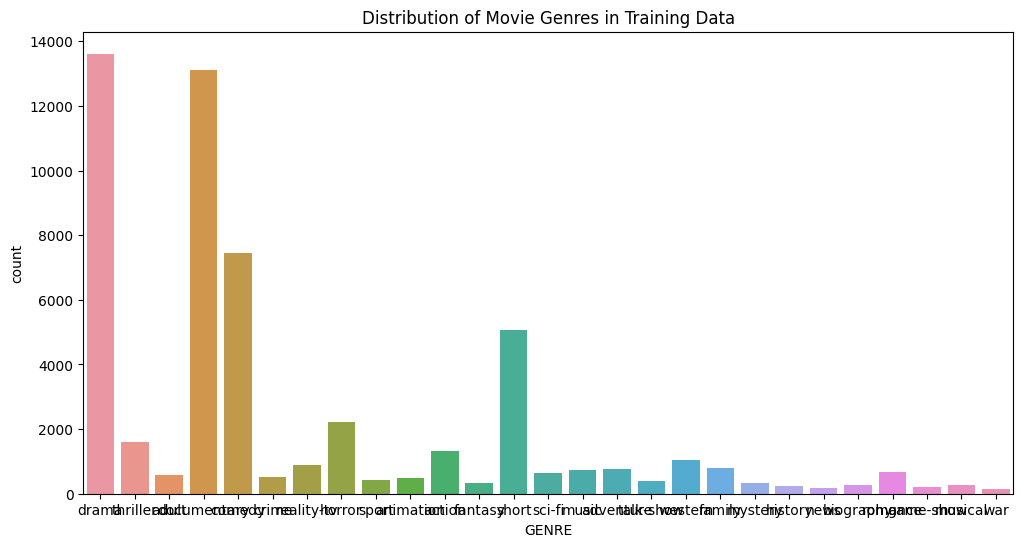

In [3]:
# Visualize the distribution of genres in the training dataset
plt.figure(figsize=(12, 6))
sns.countplot(x='GENRE', data=train_data)
plt.title('Distribution of Movie Genres in Training Data')
plt.show()


# Text Preprocessing and Data Splitting

In [5]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_data['DESCRIPTION'])
y_train = train_data['GENRE']

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Train the Logistic Regression Model

In [6]:
# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split)


LogisticRegression(max_iter=1000)

# Evaluate the Model on Validation Data

In [7]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val_split)

# Evaluate the model
accuracy = accuracy_score(y_val_split, y_val_pred)
print(f'Validation Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_val_split, y_val_pred))


Validation Accuracy: 0.58


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      action       0.52      0.26      0.34       263
       adult       0.73      0.21      0.33       112
   adventure       0.43      0.14      0.22       139
   animation       0.62      0.10      0.17       104
   biography       0.00      0.00      0.00        61
      comedy       0.51      0.58      0.55      1443
       crime       0.29      0.02      0.04       107
 documentary       0.66      0.84      0.74      2659
       drama       0.54      0.78      0.64      2697
      family       0.39      0.07      0.12       150
     fantasy       0.00      0.00      0.00        74
   game-show       0.94      0.42      0.59        40
     history       0.00      0.00      0.00        45
      horror       0.64      0.56      0.60       431
       music       0.62      0.47      0.54       144
     musical       1.00      0.02      0.04        50
     mystery       0.00      0.00      0.00        56
        news       1.00    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Load and Predict on Test Data

In [8]:
# Load the test dataset
test_data = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt', delimiter=' ::: ', header=None, names=['ID', 'TITLE', 'DESCRIPTION'])

# TF-IDF Vectorization on test data
X_test = tfidf_vectorizer.transform(test_data['DESCRIPTION'])

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Display the predicted genres for test data
test_data['PREDICTED_GENRE'] = y_test_pred
print(test_data[['ID', 'TITLE', 'PREDICTED_GENRE']])


/tmp/ipykernel_34/1230360855.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt', delimiter=' ::: ', header=None, names=['ID', 'TITLE', 'DESCRIPTION'])


          ID                           TITLE PREDICTED_GENRE
0          1            Edgar's Lunch (1998)           short
1          2        La guerra de papá (1977)           drama
2          3     Off the Beaten Track (2010)     documentary
3          4          Meu Amigo Hindu (2015)           drama
4          5               Er nu zhai (1955)           drama
...      ...                             ...             ...
54195  54196  "Tales of Light & Dark" (2013)           drama
54196  54197     Der letzte Mohikaner (1965)          action
54197  54198             Oliver Twink (2007)          comedy
54198  54199               Slipstream (1973)           drama
54199  54200       Curitiba Zero Grau (2010)     documentary

[54200 rows x 3 columns]
